<a href="https://colab.research.google.com/github/dohyeon-kim012/python-1./blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%20%ED%81%90%EB%A0%88%EC%9D%B4%ED%84%B0%202%EC%B0%A8/06.%EB%B6%80%EB%8F%99%EC%82%B0%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd

df = pd.read_csv("./house-price-clean.csv")
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,60㎡이하,2015,10,5652
2,서울,60㎡초과 85㎡이하,2015,10,5882
3,서울,85㎡초과 102㎡이하,2015,10,5721
4,서울,102㎡초과,2015,10,5879
...,...,...,...,...,...
4180,경남,85㎡초과 102㎡이하,2020,2,3247
4181,제주,전체,2020,2,3955
4182,제주,60㎡이하,2020,2,4039
4183,제주,60㎡초과 85㎡이하,2020,2,3962


In [ ]:
# 규모구분이 '전체'인 행 삭제하기
drop_idx = df.loc[df['규모구분'] == '전체', '규모구분'].index
df = df.drop(drop_idx)
df.head()

,지역명,규모구분,연도,월,분양가격
1,서울,60㎡이하,2015,10,5652
2,서울,60㎡초과 85㎡이하,2015,10,5882
3,서울,85㎡초과 102㎡이하,2015,10,5721
4,서울,102㎡초과,2015,10,5879
6,인천,60㎡이하,2015,10,3488


In [ ]:
# 인덱스 재설정하기
df = df.reset_index(drop=True)
df.head()

,지역명,규모구분,연도,월,분양가격
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488


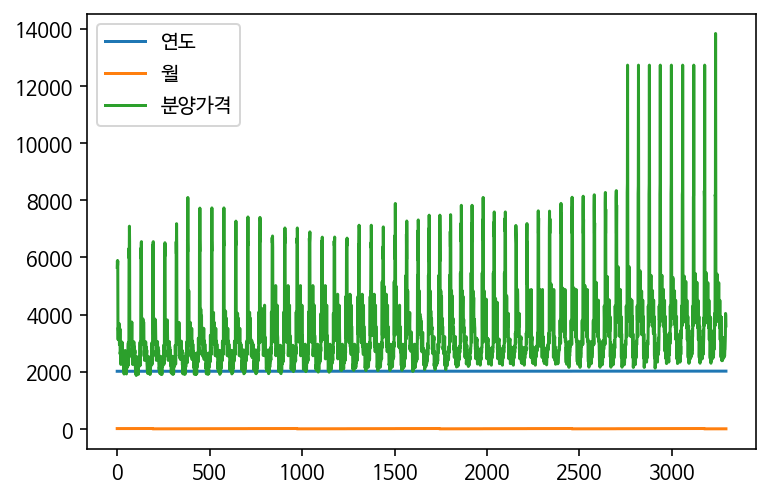

In [ ]:
df.plot()

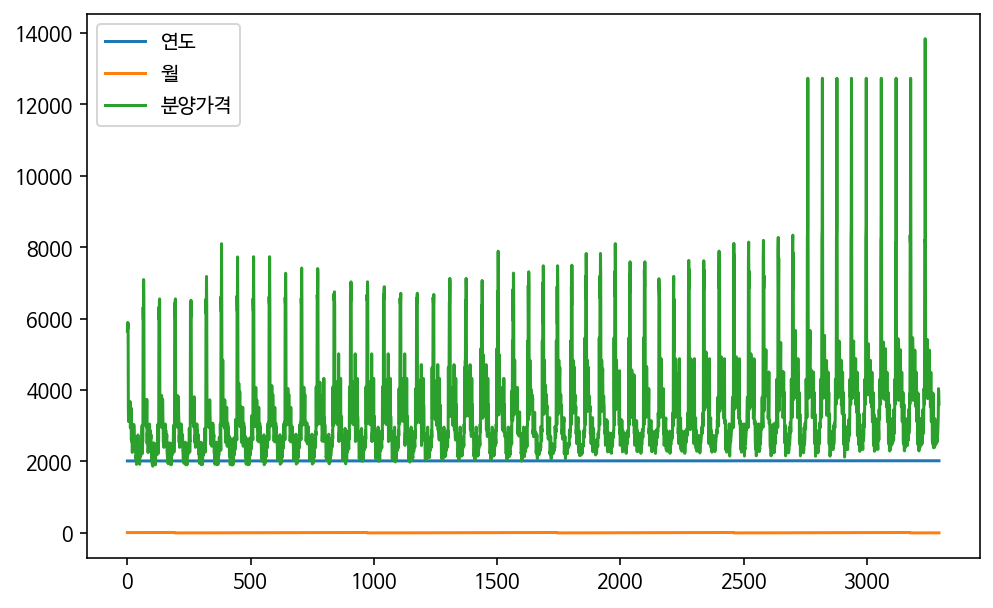

In [ ]:
# 그래프의 크기를 조절해서 고정하기  size=(가로, 세로)
plt.rcParams['figure.figsize'] = (8, 5)
df.plot()

# pandas 데이터 프레임에서 그래프 그리기
## Plot 그래프
* plot은 기본적으로 일반 선 그래프를 의미
* 'kind' 옵션을 이용해 원하는 그래프를 그릴 수 있음
    * **line : 선그래프**
    * **bar : 바 그래프 (수직 바)**
    * **barh : 수평 바 그래프 (수평 바)**
    * **hist : 히스토그램**
    * **kde : 커널 밀도 그래프**
    * hexbin : 고밀도 산점도 그래프
    * **box : 박스 플롯**
    * area : 면적 그래프
    * pie : 파이 그래프
    * **scatter : 산점도 그래프**

### 1. line 그래프
* line 그래프는 데이터가 연속적인 특징을 띄고 있을 때 사용
    * 시계열 데이터
        * 유전자 데이터 - 순서가 바뀌면 아예 의미를 잃어버리는 데이터 (ex. 텍스트)
        * 시간의 흐름에 따라 수집된 데이터 (ex. 주식)
        * 일정 시간 동안 집계된 데이터 (ex. 13:00 ~ 14:00 강우량 평균)

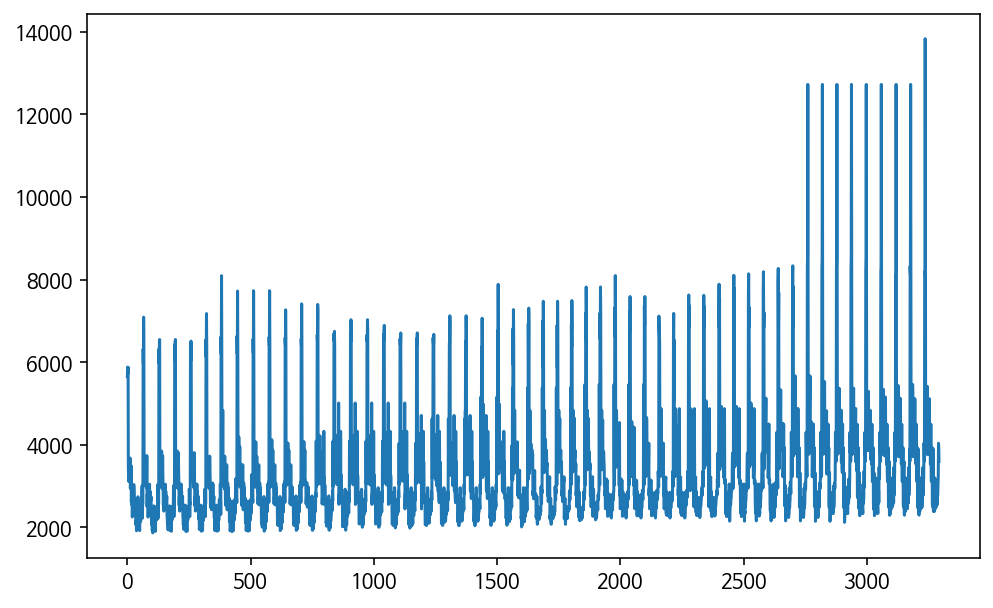

In [ ]:
# x축을 따로 지정하지 않으면 데이터 프레임의 인덱스가 x축이 됨
df['분양가격'].plot(kind='line')

서울 지역의 분양가만 뽑고 싶다면

In [ ]:
# 1. 서울 지역의 데이터 뽑기
df_seoul = df.loc[df['지역명'] == '서울']
df_seoul.head()

,지역명,규모구분,연도,월,분양가격
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
64,서울,60㎡이하,2015,11,6320


In [ ]:
# 2. 연도별 분양가 평균 구하기
df_seoul_year = df_seoul.groupby('연도')['분양가격'].mean()
df_seoul_year

연도
2015    6201.000000
2016    6674.520833
2017    6658.729167
2018    7054.687500
2019    8735.083333
2020    9647.375000
Name: 분양가격, dtype: float64

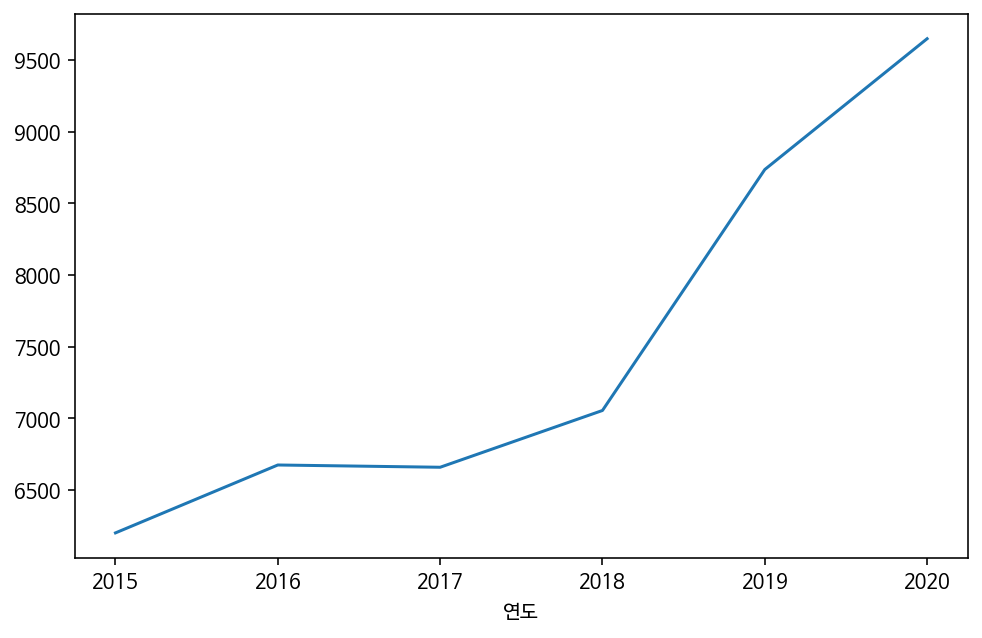

In [ ]:
df_seoul_year.plot(kind='line')

### bar 그래프
* bar 그래프는 그룹별(카테고리별)로 비교할 떄 유용

In [ ]:
# 지역별 분양가 평균
local_price_mean = df.groupby('지역명')['분양가격'].mean()
local_price_mean

지역명
강원    2448.156863
경기    4133.952830
경남    2858.932367
경북    2570.465000
광주    3055.043750
대구    3679.620690
대전    3176.127389
부산    3691.981132
서울    7308.943396
세종    2983.543147
울산    2990.373913
인천    3684.302885
전남    2326.250000
전북    2381.416268
제주    3472.677966
충남    2534.950000
충북    2348.183962
Name: 분양가격, dtype: float64

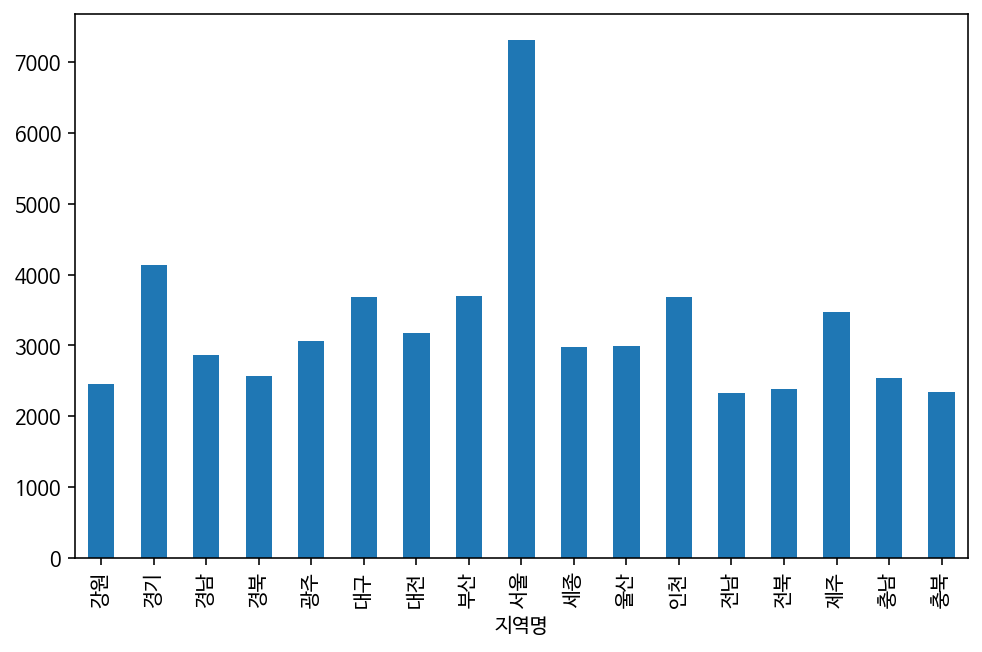

In [ ]:
local_price_mean.plot(kind='bar')

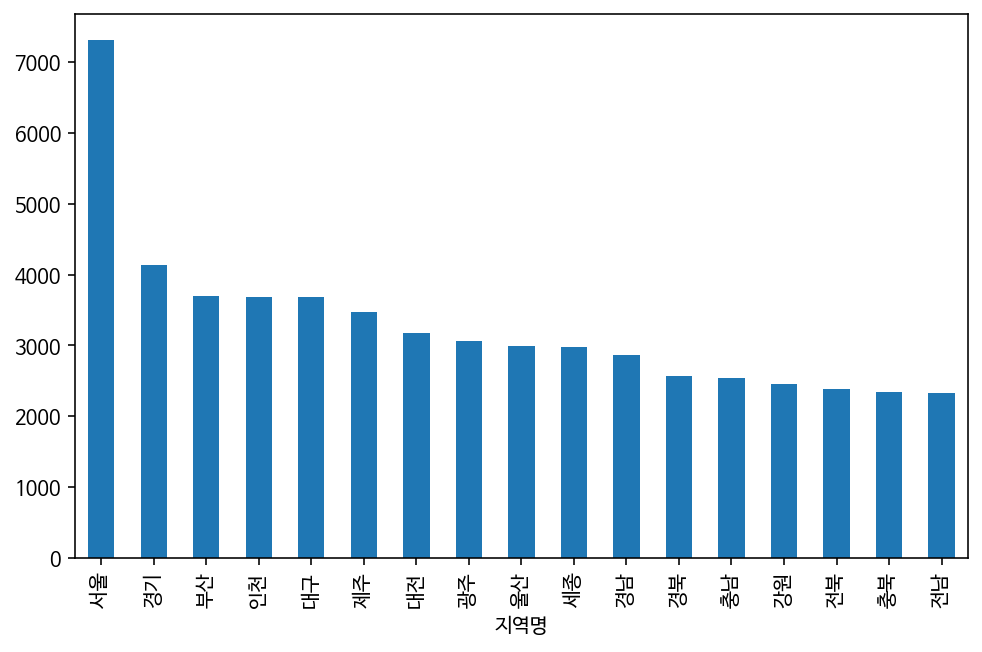

In [ ]:
# 분양가격 내림차순으로 정렬해서 확인
local_price_mean_sorted = local_price_mean.sort_values(ascending=False)
local_price_mean_sorted.plot(kind='bar')

### barh 그래프
* x축이 원래 인덱스였는데, y축이 인덱스가 됨

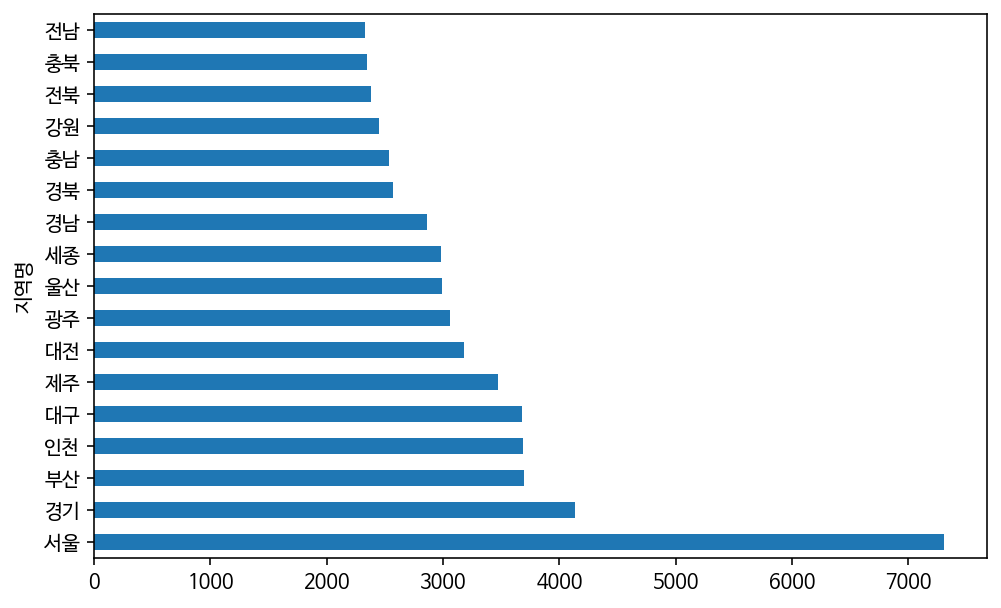

In [ ]:
local_price_mean_sorted.plot(kind='barh')

### 히스토그램
히스토그램은 **분포-빈도**를 시각화 해서 보여줌
* 가로축 : 분포(데이터)
* 세로축 : 빈도 

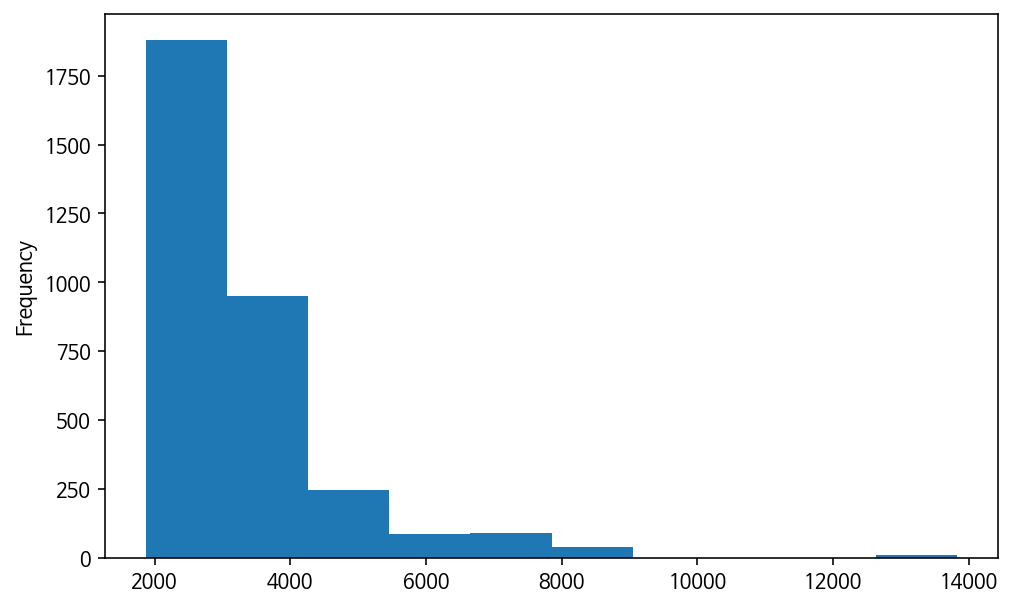

In [ ]:
# 분양가격의 구간별 빈도수
df['분양가격'].plot(kind='hist')

값에 로그를 씌우면 정규분포와 비슷하게 만들 수 있음! -> **특성공학**

### 커널 밀도 그래프
* 히스토그램과 유사하게 밀도를 부여주는 그래프
* 히스토그램과 유사한 모양 가짐
* 부드러운 라인 가지고 있음 -> 구간에 속할 확률을 나타내기 때문에 곡선

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


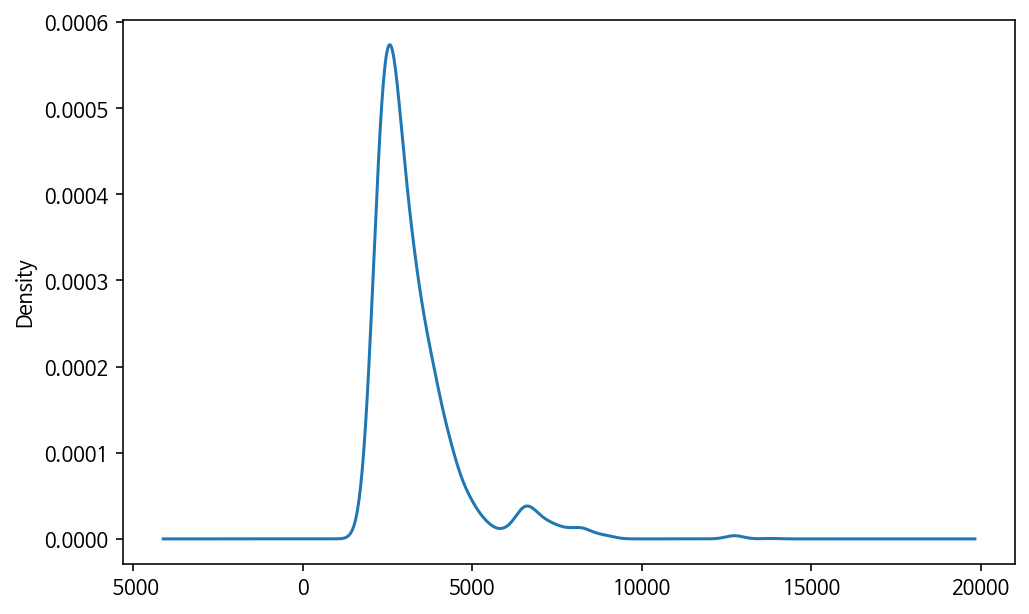

In [ ]:
df['분양가격'].plot(kind='kde')  # kde : Kernel Density Estimation

### Hexbin
고밀도 산점도 그래프
* x와 y를 모두 넣어줘야 함
    * 둘 다 numeric 값이어야 함
* 데이터의 밀도를 추정

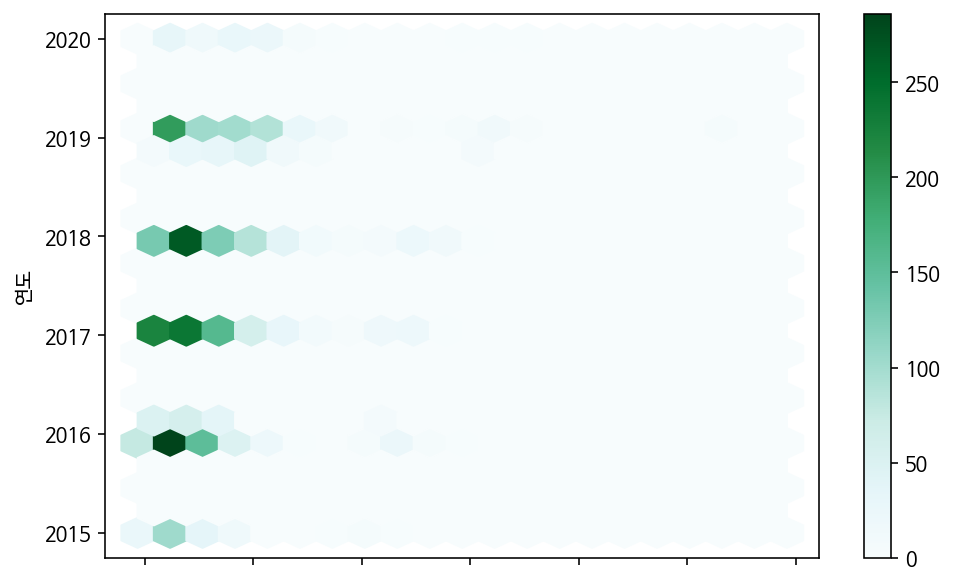

In [ ]:
# 연도별 분양가격의 밀도를 추정하기
df.plot(kind='hexbin', x='분양가격', y='연도', gridsize=20)

오른쪽 컬러바가 분양가격의 밀도(개수)를 나타냄

### 박스 플롯(box)
* 데이터의 최대, 최소, 평균, 중간값 등 집계된 정보를 한 눈에 볼 수 있음
* 이상치(outlier) 또한 손쉽게 판단 가능

In [ ]:
df_seoul = df.loc[df['지역명'] == '서울']
df_seoul

,지역명,규모구분,연도,월,분양가격
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
64,서울,60㎡이하,2015,11,6320
...,...,...,...,...,...
3178,서울,102㎡초과,2020,1,8779
3234,서울,60㎡이하,2020,2,8193
3235,서울,60㎡초과 85㎡이하,2020,2,8140
3236,서울,85㎡초과 102㎡이하,2020,2,13835


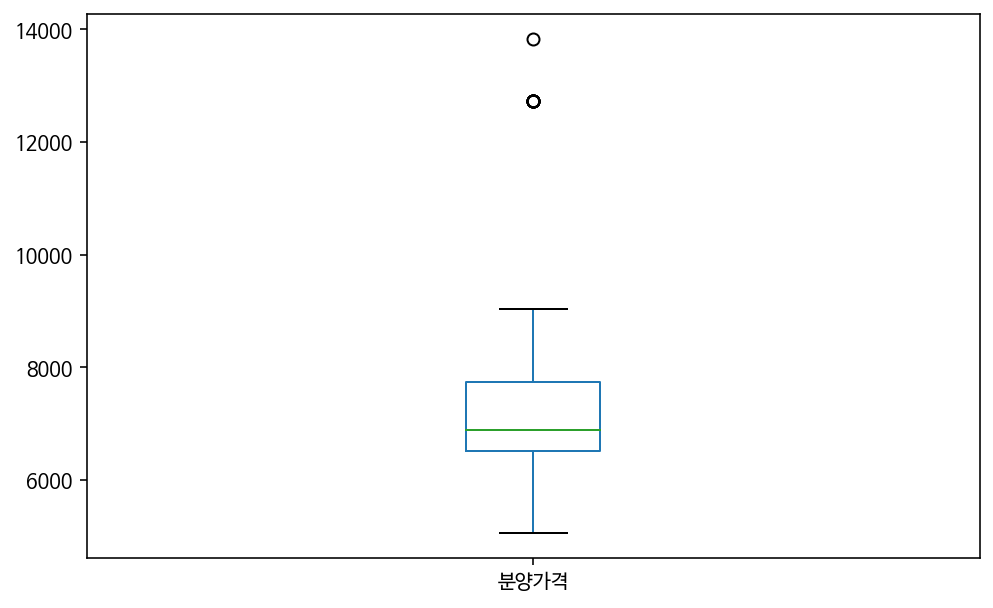

In [ ]:
df_seoul['분양가격'].plot(kind='box')

* 가장 위의 동그라미 두 개가 이상치(outlier)
* 박스 아랫쪽에 outlier가 위치할 수도 있음
* 가운데 초록색 선은 median 값(평균이 아닌 단순히 개수 중 가운데 값)
* 박스 사각형의 위쪽 선이 75% (3quarter) , 아랫선이 25% (first quarter)
* 가장 위 선이 3Q 값 + IQR (감안할 수 있는 오차범위) , 가장 아래 선은 1Q 값 - IQR


In [ ]:
df_seoul.describe()['분양가격']

count      212.000000
mean      7308.943396
std       1402.869496
min       5061.000000
25%       6519.750000
50%       6895.500000
75%       7732.000000
max      13835.000000
Name: 분양가격, dtype: float64

IQR = (3Q - 1Q) * 1.5 -> 선의 길이

In [ ]:
Q3 = 7732
Q1 = 6519.75

IQR = (Q3 - Q1) * 1.5
IQR

1818.375

In [ ]:
# 최대 범위
Q3 + IQR

9550.375

In [ ]:
# 최소 범위
Q1 - IQR

4701.375

박스 플롯은 데이터의 이상치(outlier)를 감지할 때 가장 많이 활용됨

### area plot
line 그래프에서 아래 영역(area)를 색칠해 주는 것이 특징

In [ ]:
# 월별 분양가격의 개수 카운트
price_by_month_count = df.groupby('월')['분양가격'].count()
price_by_month_count

월
1     308
2     307
3     246
4     251
5     251
6     250
7     248
8     248
9     248
10    316
11    312
12    308
Name: 분양가격, dtype: int64

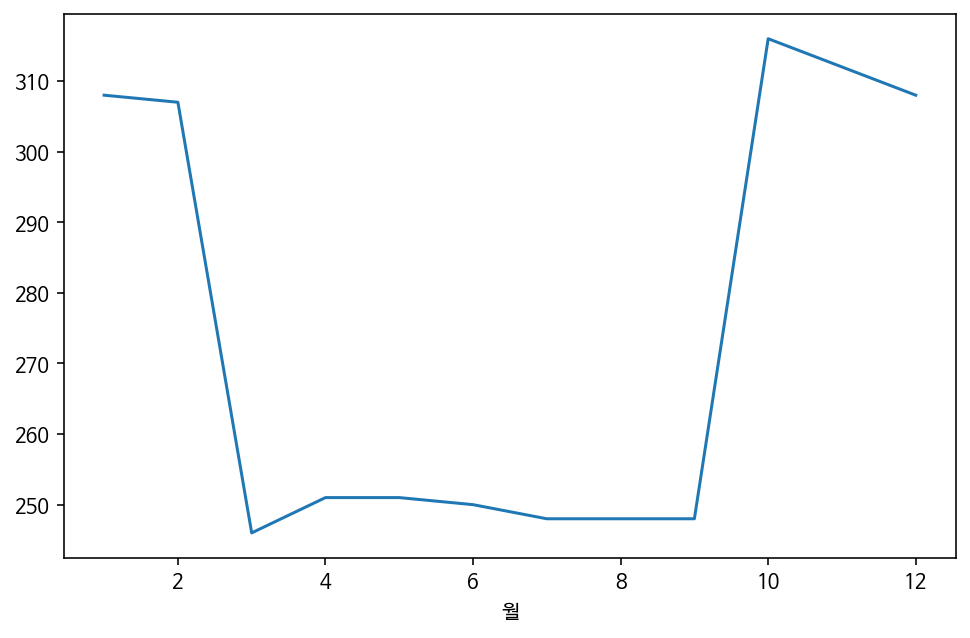

In [ ]:
price_by_month_count.plot(kind='line')
# line 그래프는 최소값을 기준으로 그려짐

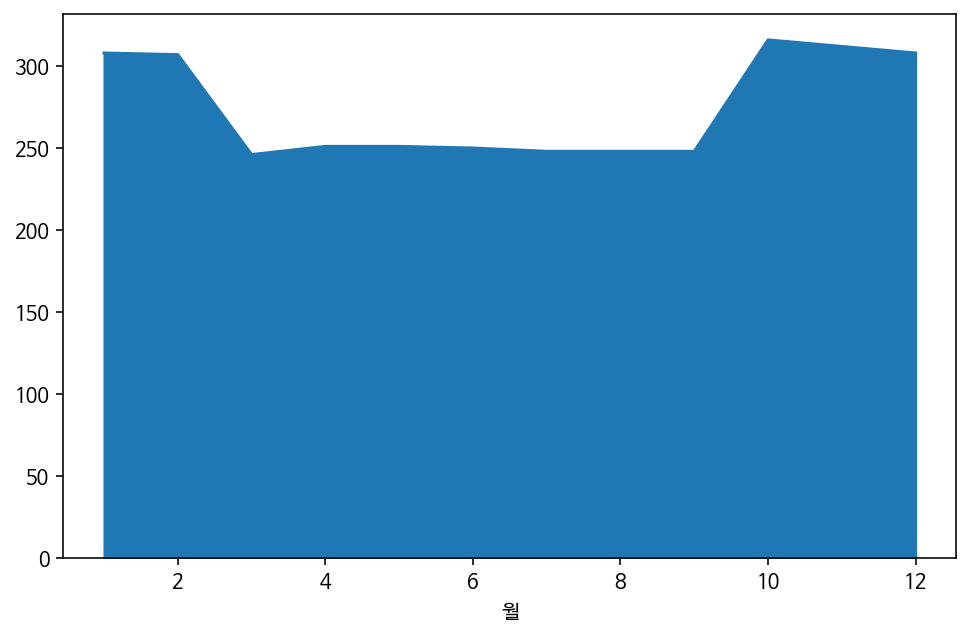

In [ ]:
price_by_month_count.plot(kind='area')
# area 그래프는 0 값을 기준으로 그려짐

### pie plot
pie의 대표적인 사용처 : 데이터의 점유율(%)을 볼 때 가장 많이 사용

In [ ]:
price_by_year = df.groupby('연도')['분양가격'].count()
price_by_year

연도
2015    192
2016    780
2017    771
2018    716
2019    716
2020    118
Name: 분양가격, dtype: int64

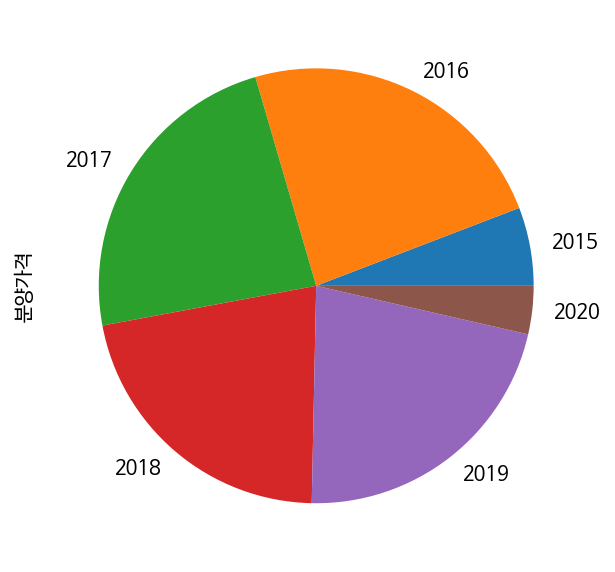

In [ ]:
price_by_year.plot(kind='pie')

### Scatter plot (산점도 그래프)
* 점으로 데이터를 표기
* x, y 값을 모두 넣어줘야 하며, x y축 모두 numeric 값을 넣어줘야 함
* 데이터의 분포도를 확인하기 위해 사용

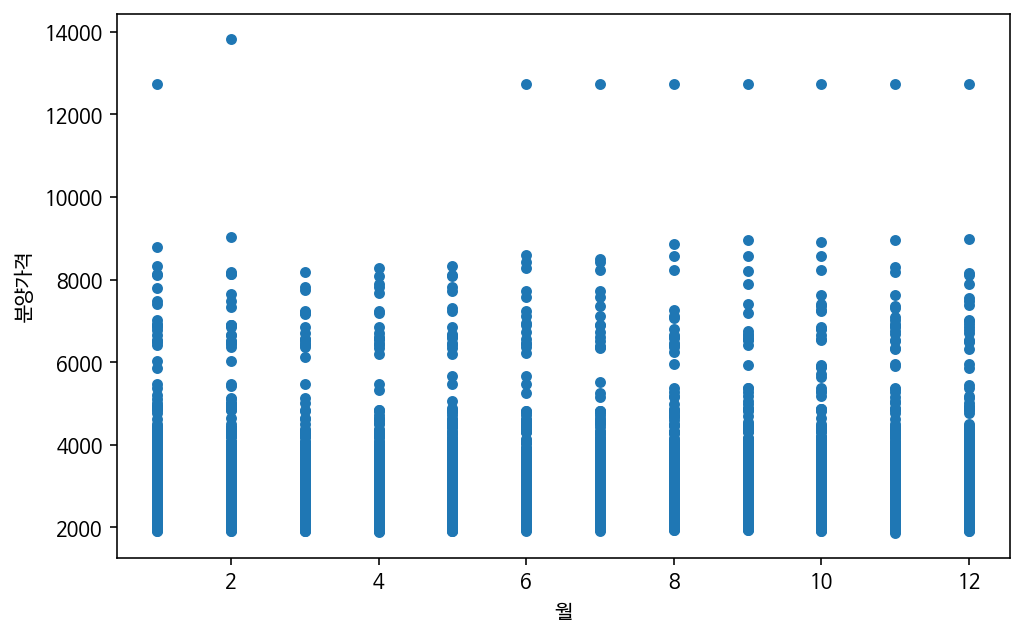

In [ ]:
df.plot(x='월', y='분양가격', kind='scatter')